In [3]:
from lightkurve import TessTargetPixelFile

In [44]:
tpf = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=86.90058899&dec=9.28265381&y=55&x=55&units=px&sector=All')

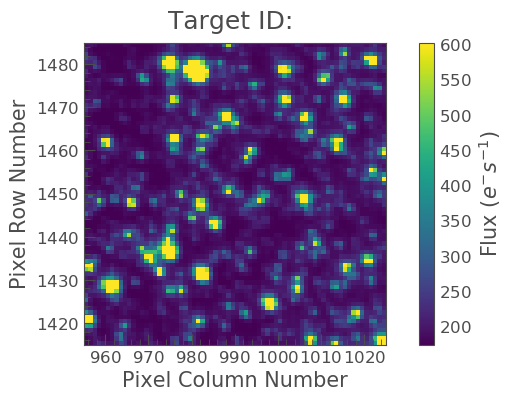

In [43]:
tpf.plot()

In [26]:
tpf1 = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=86.90058899&dec=9.28265381&y=10&x=6&units=px&sector=All')

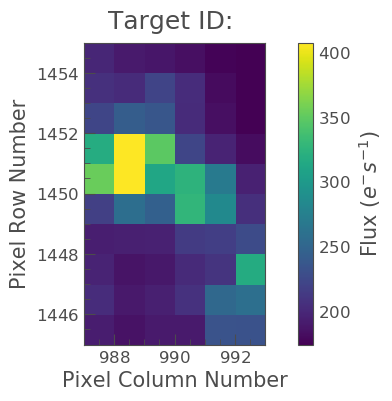

In [27]:
tpf1.plot()

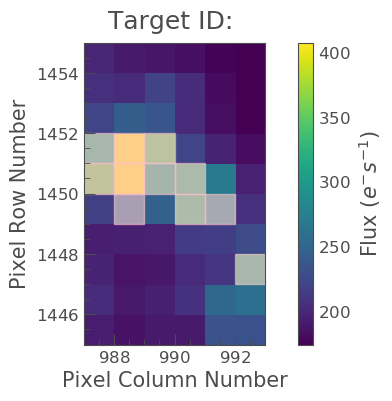

In [32]:
#This code is used to create a new aperture. Please note that this code is from Lightkurve Tutorials. 
import numpy as np
# Create a median image of the source over time
median_image = np.nanmedian(tpf1.flux, axis=0)
# Select pixels which are brighter than the 86th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 83)
# Plot that aperture
tpf1.plot(aperture_mask=aperture_mask);

In [33]:
lc= tpf1.to_lightcurve(aperture_mask=aperture_mask)

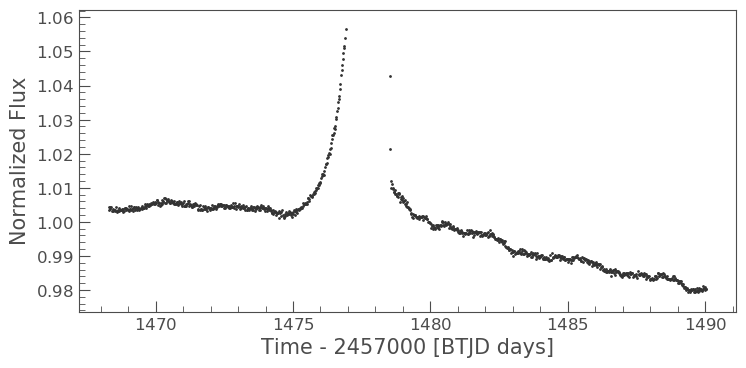

In [34]:
lc.remove_nans().remove_outliers(sigma=5).scatter()

In [35]:
pg = lc.to_periodogram(oversample_factor=1)

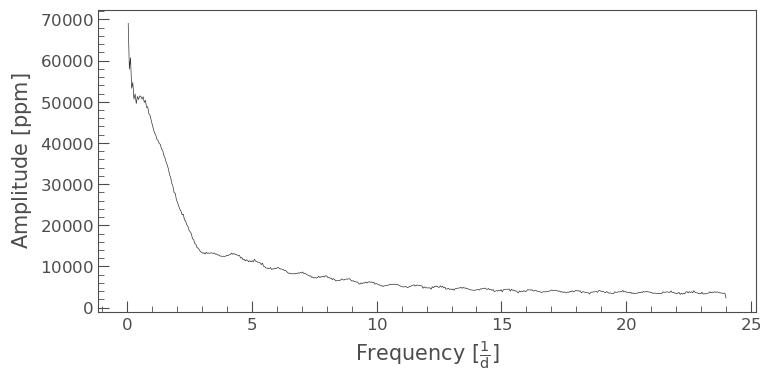

In [36]:
pg.plot()

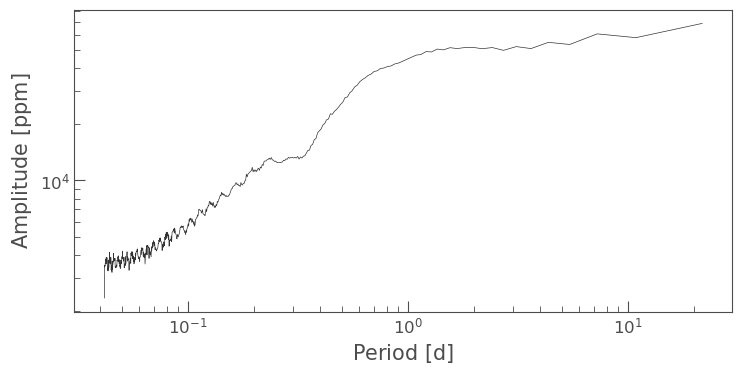

In [37]:
pg.plot(view='period', scale='log')

In [38]:
period = pg.period_at_max_power
print("Best Period:{}".format(period))

Best Period:21.74969482421875 d


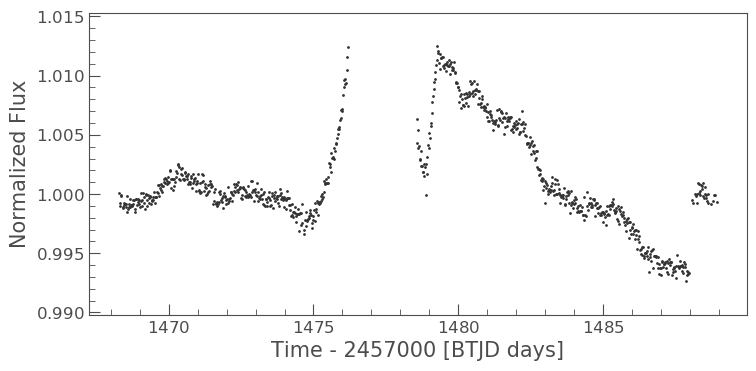

In [41]:
lc.remove_nans().remove_outliers(sigma=2).flatten(window_length=1477).scatter()